Please enter your Microsoft Computer Vision subscription key: 7efc901b71994794b1e8d2dcb16c8b8a
Please enter your Microsoft Azure enpoint: https://thenedfactor.cognitiveservices.azure.com/
Please enter the URL of the image you wish to analyse: https://media-exp1.licdn.com/dms/image/C5603AQG3PSV4Qex6YA/profile-displayphoto-shrink_400_400/0?e=1603324800&v=beta&t=a7TZpPOl2ZcJvVTTMapVnGM6TI6vdae8fyP0h_3EQwA
https://media-exp1.licdn.com/dms/image/C5603AQG3PSV4Qex6YA/profile-displayphoto-shrink_400_400/0?e=1603324800&v=beta&t=a7TZpPOl2ZcJvVTTMapVnGM6TI6vdae8fyP0h_3EQwA
{'categories': [{'name': 'text_mag', 'score': 0.98046875}], 'color': {'dominantColorForeground': 'Black', 'dominantColorBackground': 'Black', 'dominantColors': ['Black'], 'accentColor': '7E423B', 'isBwImg': False, 'isBWImg': False}, 'imageType': {'clipArtType': 0, 'lineDrawingType': 0}, 'tags': [{'name': 'text', 'confidence': 0.9993963241577148}, {'name': 'person', 'confidence': 0.9993216395378113}, {'name': 'man', 'confidence'

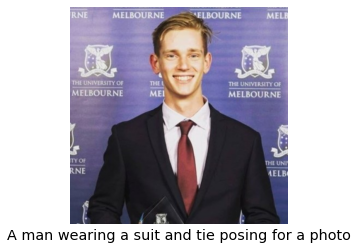

Would you like to know how much of the frame is occupied by the face? (Y/N): Y
4.515625%
Suggestion: choose a picture where you're closer to the camera!
Is the person smiling? (press ENTER) 
Yes
Would you like to blur everything except the face? (Y/N): Y


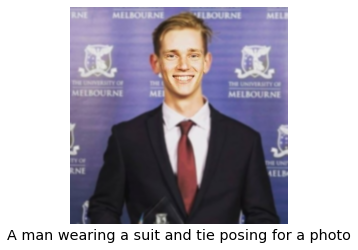

Add contrast? (Y/N): Y


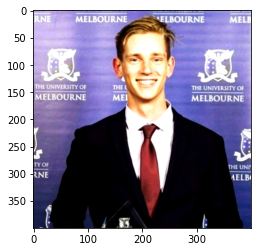

In [6]:
# Much of this code was found on the Microsoft Computer Vision documentation:
# https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts/python-analyze

# This code ustilises the Microsoft Computer Vision API to perform analysis on an image based on the image URL
# (found in the HTML description of a web page). I.e. right-click on the image, "Inspect", copy URL from the <img>
# tag. For this particular task, which is to perform analysis on a LinkedIn profile photo based on the profile URL, 
# it would have been preferable to use the LinkedIn API to do so; however, I could not get permission to use this API. 

import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image, ImageEnhance
from io import BytesIO
import cv2
import numpy as np

# User inputs: must give Azure subscription key, endpoint and URL of image to analyse.
subscription_key = input('Please enter your Microsoft Computer Vision subscription key: ')
endpoint = input('Please enter your Microsoft Azure enpoint: ')
image_url = input('Please enter the URL of the image you wish to analyse: ')
print(image_url)

analyze_url = endpoint + "vision/v3.0/analyze"

# Request data: 
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color,Faces,Tags,ImageType'}
data = {'url': image_url}
response = requests.post(analyze_url, headers=headers,
                         params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
json_data = json.loads(response.text)
print(json_data)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

# Now write numerous inputs that ask user what they want to know about the profile picture.
# These are just some examples of what can be done with the Microsoft Computer Vision API.

face_height = json_data['faces'][0]['faceRectangle']['height']
face_width = json_data['faces'][0]['faceRectangle']['width']
pic_height = json_data['metadata']['height']
pic_width = json_data['metadata']['width']
    
# Find out how much of the profile picture the face occupies:
face = input('Would you like to know how much of the frame is occupied by the face? (Y/N): ')
if face == 'Y':
    print(str(face_height*face_width/(pic_height*pic_width)*100)+'%')
    if (face_height*face_width/(pic_height*pic_width)*100) < 10:
        print("Suggestion: choose a picture where you're closer to the camera!")
else:
    pass

# Sentiment analysis on profile picture:
smile = input('Is the person smiling? (press ENTER) ')
if 'smiling' in json_data['description']['tags']:
    print('Yes')
else:
    print('No')
    print("Suggestion: choose a picture where you're smiling!")
    
# Perform modifications on the profile picture:
blur = input('Would you like to blur everything except the face? (Y/N): ')
if blur == 'Y':
    image_array = np.array(image)
    blurred_img = cv2.GaussianBlur(image_array, (7, 7), 0)
    
    mask = np.zeros((pic_width, pic_height, 3), dtype=np.uint8)
    x_centre = json_data['faces'][0]['faceRectangle']['left'] + face_width/2
    y_centre = json_data['faces'][0]['faceRectangle']['top'] + face_height/2
    mask = cv2.circle(mask, (int(x_centre), int(y_centre)), max(face_width,face_height)//2, (255,255,255), -1)

    out = np.where(mask==(255, 255, 255), image_array, blurred_img)

    plt.imshow(out)
    plt.axis("off")
    plt.plot(x_centre,y_centre,color='red')
    _ = plt.title(image_caption, size="x-large", y=-0.1)
    plt.show()
else:
    pass

contrast = input("Add contrast? (Y/N): ")
if contrast =='Y':
    enh_con = ImageEnhance.Contrast(image)
    contrast = 1.5
    image_contrasted = enh_con.enhance(contrast)
    plt.imshow(image_contrasted)
else:
    pass